In [1]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_multivariate_classification_data(means, cov, size):
    X = []
    y = []
    label = 0
    for m,covar,s in zip(means, cov, size):
        xi =  np.random.multivariate_normal(m, covar, size=s)
        yi = label*np.ones((len(xi),))
        X.append(xi)
        y.append(yi)
        label += 1
    X = np.concatenate(X, axis=0)
    y = np.concatenate(y, axis=0)
    ix = np.arange(len(X))
    np.random.shuffle(ix)
    X = X[ix]
    y = y[ix]
    return X, y

(400, 2) (400,)


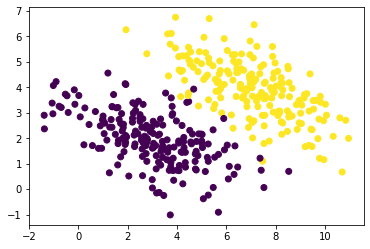

In [32]:
# Create bivariate Data
means = [
    [3, 2],
    [7, 4],
]

cov = [
    [[3, -1], [-1, 1]],
    [[3, -1], [-1, 1]],
]

size = [200, 200]

X, y = generate_multivariate_classification_data(means, cov, size)
print(X.shape, y.shape)
plt.scatter(X[:,0], X[:,1], c=y,  cmap=plt.cm.viridis)
plt.show()


In [40]:
np.save("X_bivariate",X)
np.save("y_bivariate", y)

In [4]:
X = np.load("X_bivariate.npy")
y = np.load("y_bivariate.npy")
print(X.shape, y.shape)

(400, 2) (400,)


In [5]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
colors = ["#f59fc7", "#94dae3"] # region
colors2 = ["#e82580", "#0c89a6"] #points 
m1 = ListedColormap(colors)
m2 = ListedColormap(colors2)

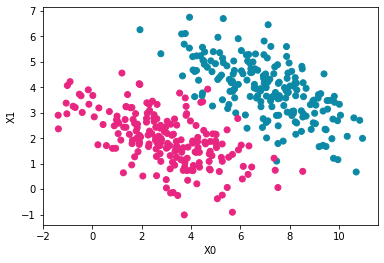

In [6]:
plt.scatter(X[:,0], X[:,1], c=y,  cmap=m2)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [7]:
dt = DecisionTreeClassifier()
dt.fit(X, y)

DecisionTreeClassifier()

In [8]:
f0 = np.linspace(X[:,0].min(), X[:,0].max(), 100)
f1 = np.linspace(X[:,1].min(), X[:,1].max(), 100)
f0, f1 = np.meshgrid(f0, f1)
pred = []
for x in zip(f0.reshape(-1,1),f1.reshape(-1,1)):
    tp = np.array(x).reshape(1,-1)
    pred.append(dt.predict(tp))
len(pred)

10000

In [9]:
pred= np.array(pred)
print(pred.shape)

(10000, 1)


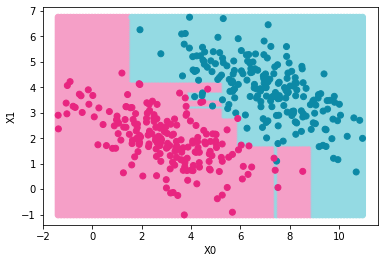

In [10]:
## Plot decision region
plt.scatter(f0.reshape(1,-1), f1.reshape(1,-1), c=pred.reshape(1,-1), cmap=m1)
plt.scatter(X[:,0], X[:,1], c=y,  cmap=m2)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()


In [11]:
print(dt.get_depth(), dt.get_n_leaves())

7 15


In [12]:
dt.feature_importances_

array([0.63422914, 0.36577086])

## Visualize decision tree

In [14]:
import graphviz
from sklearn.tree import export_graphviz

In [31]:
export_graphviz(dt, out_file="tree.dot", feature_names=["X0", "X1"],  
                                class_names=["0", "1"],
                                filled=True, rounded=True)

In [27]:
print(dot_data)

None


In [50]:
# !dot -Tpng dt_final -o tree.png 

## Decision Region w.r.t max_depth

In [49]:
m3 = ListedColormap(["#ca7ff5", "#f5e57f"]) # purple purple
m4 = ListedColormap(["#610696", "#f5e57f"])

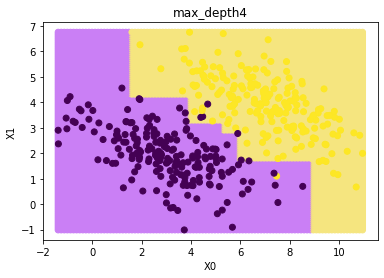

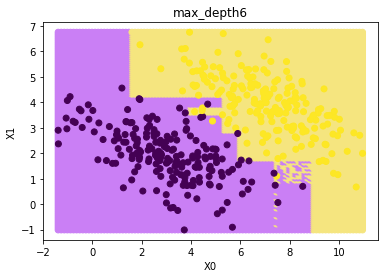

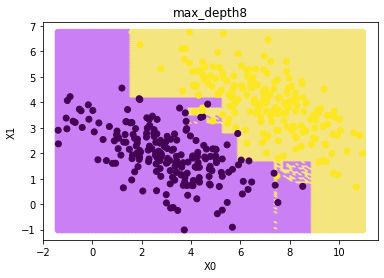

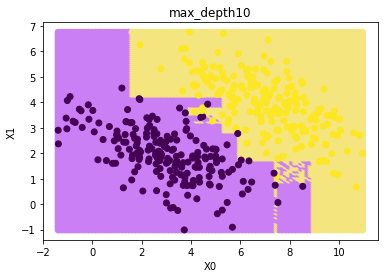

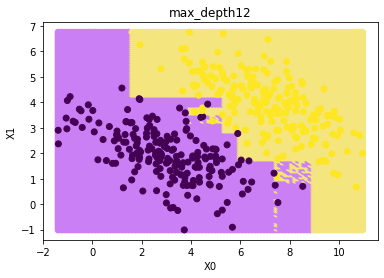

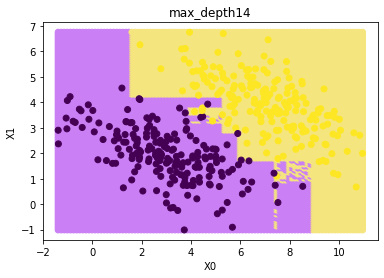

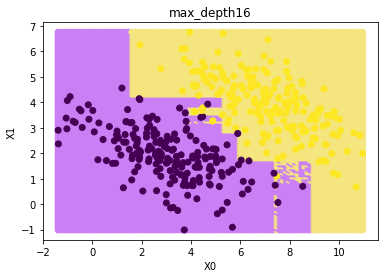

In [51]:
max_depth = [4, 6, 8, 10, 12, 14, 16]
pred = []
for depth in max_depth:
    pred_ = []
    for x in zip(f0.reshape(-1,1),f1.reshape(-1,1)):
        tp = np.array(x).reshape(1,-1)
        dt_ = DecisionTreeClassifier(max_depth=depth)
        dt_.fit(X, y)
        pred_.append(dt_.predict(tp))
    pred_ = np.array(pred_)
                                
        
    plt.scatter(f0.reshape(1,-1), f1.reshape(1,-1), c=pred_.reshape(1,-1), cmap=m3)
    plt.scatter(X[:,0], X[:,1], c=y,  cmap=plt.cm.viridis)
    plt.xlabel("X0")
    plt.ylabel("X1")
    plt.title("max_depth: " + str(depth))
    plt.show()

In [52]:
from mpl_toolkits import mplot3d

(400, 3) (400,)


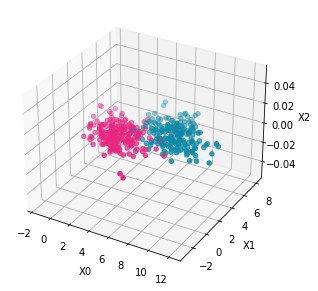

In [63]:
## Trivariate data
# Create bivariate Data
means = [
    [3, 2, 4],
    [7, 4, 7],
]

cov = [
    [[3, -1, -1], [-1, 2, -1], [-1, -1, 2]],
    [[3, -1, -1], [-1, 2, -1], [-1, -1, 2]],
]

size = [200, 200]

X, y = generate_multivariate_classification_data(means, cov, size)

print(X.shape, y.shape)
plt.figure(figsize = (5,5))
ax = plt.axes(projection='3d')

ax.scatter(X[:,0], X[:,1], c=y,  cmap=m2) # training points
ax.set_xlabel("X0")
ax.set_ylabel("X1")
ax.set_zlabel("X2")

plt.show()


In [64]:
np.save("X_trivariate", X)
np.save("y_trivariate", y)

In [65]:
dt3 = DecisionTreeClassifier()
dt3.fit(X,y)

DecisionTreeClassifier()

In [66]:
dt.feature_importances_, dt.get_depth()

(array([0.64724319, 0.112603  , 0.24015382]), 5)

In [67]:
f0 = np.linspace(X[:,0].min(), X[:,0].max(), 50)
f1 = np.linspace(X[:,1].min(), X[:,1].max(), 50)
f2 = np.linspace(X[:,2].min(), X[:,2].max(), 50)

f0, f1, f2 = np.meshgrid(f0, f1, f2)
print(f0.shape, f1.shape, f2.shape)

pred = []
for x in zip(f0.reshape(-1,1),f1.reshape(-1,1), f2.reshape(-1,1)):
    tp = np.array(x).reshape(1,-1)
    pred.append(dt.predict(tp))
len(pred)
pred = np.array(pred)

(50, 50, 50) (50, 50, 50) (50, 50, 50)


In [68]:
print(pred.shape)

(125000, 1)


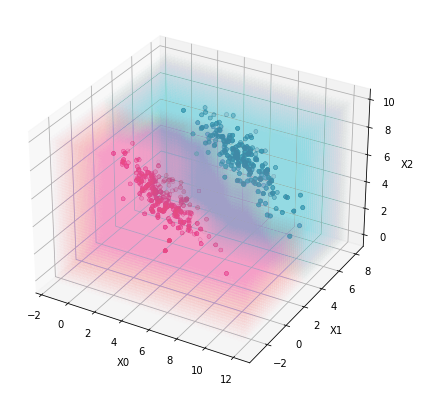

In [73]:
plt.figure(figsize = (7,7))
ax = plt.axes(projection='3d')

ax.scatter(f0.reshape(1,-1), f1.reshape(1,-1), f2.reshape(1,-1), c=pred.reshape(1,-1),  cmap=m1, alpha=0.01) # training points
ax.scatter(X[:,0], X[:,1], X[:,2], c=y,  cmap=m2) # training points
ax.set_xlabel("X0")
ax.set_ylabel("X1")
ax.set_zlabel("X2")

plt.show()